In [2]:
import numpy as np
import cv2
import math
import matplotlib.pyplot as plt

## part a

<h3> in this section we want to implement histogram equalization </h3>
<h3> you can use opencv library </h3>

In [3]:
image = cv2.imread('img_improvment.png',cv2.IMREAD_GRAYSCALE)
output_image = image.copy()
equalize_image = cv2.equalizeHist(image)

(-0.5, 383.5, 287.5, -0.5)

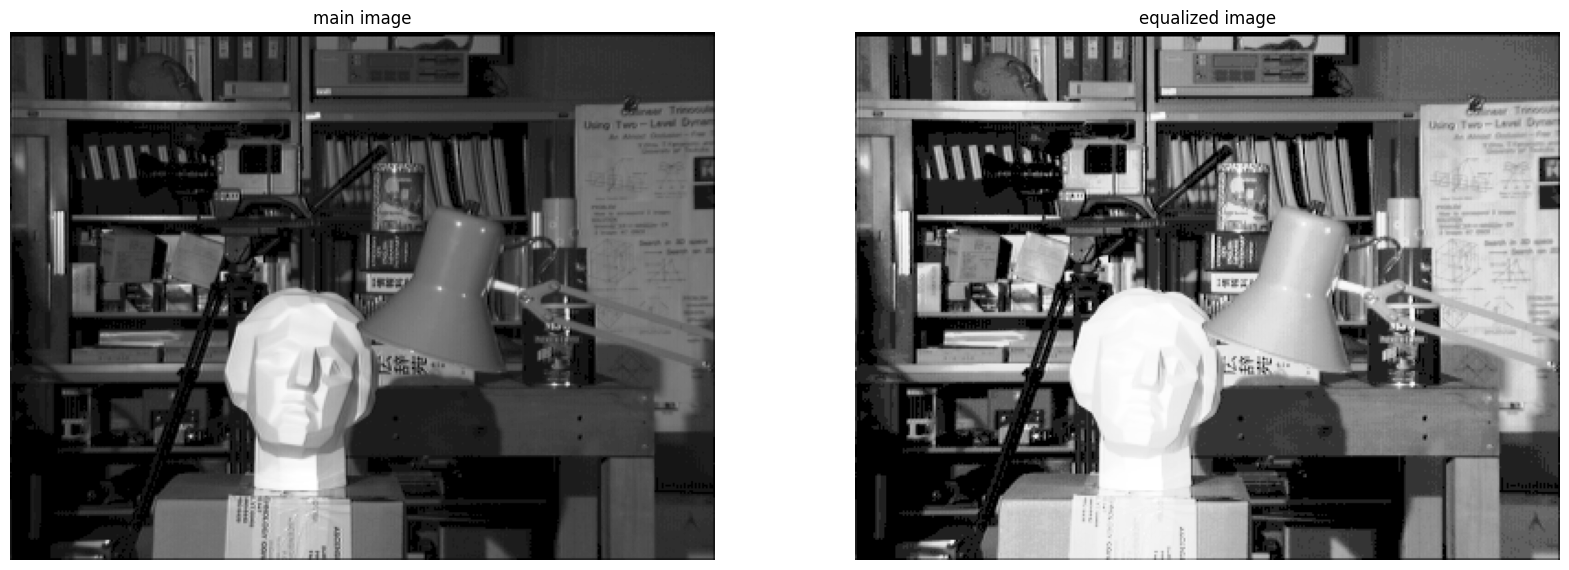

In [6]:
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.imshow(image, cmap='gray')
plt.title('main image')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(equalize_image, cmap='gray')
plt.title('equalized image')
plt.axis('off')

## part b1


<h3> in this section we want to implement the first method for ACE </h3>
<h3> you are free to use opencv library </h3>


In [8]:
def ACE1(image, gridSize):
  '''
  you can use the equalize function of OpenCV for each grid
  Use first method for ACE implementation (calculating transition function for each grid)
  input(s):
    image (ndarray): input image
    gridSize (int): window size for calculating histogram equalization
  output(s):
    output (ndarray): improved image
  '''
  x,y = image.shape
  output_image = image.copy()

  # Iterate over image in grid-wise manner
  for i in range(0, x, gridSize):
    for j in range(0, y, gridSize):
      # Define grid boundaries
      x_min = i
      x_max = min(i + gridSize, x)
      y_min = j
      y_max = min(j + gridSize, y)
      
      # Extract grid from image
      grid = image[x_min:x_max, y_min:y_max]
      
      # Apply histogram equalization using OpenCV
      equalized_grid = cv2.equalizeHist(grid)
      
      # Update grid in output image
      output_image[x_min:x_max, y_min:y_max] = equalized_grid

  return output_image

(-0.5, 383.5, 287.5, -0.5)

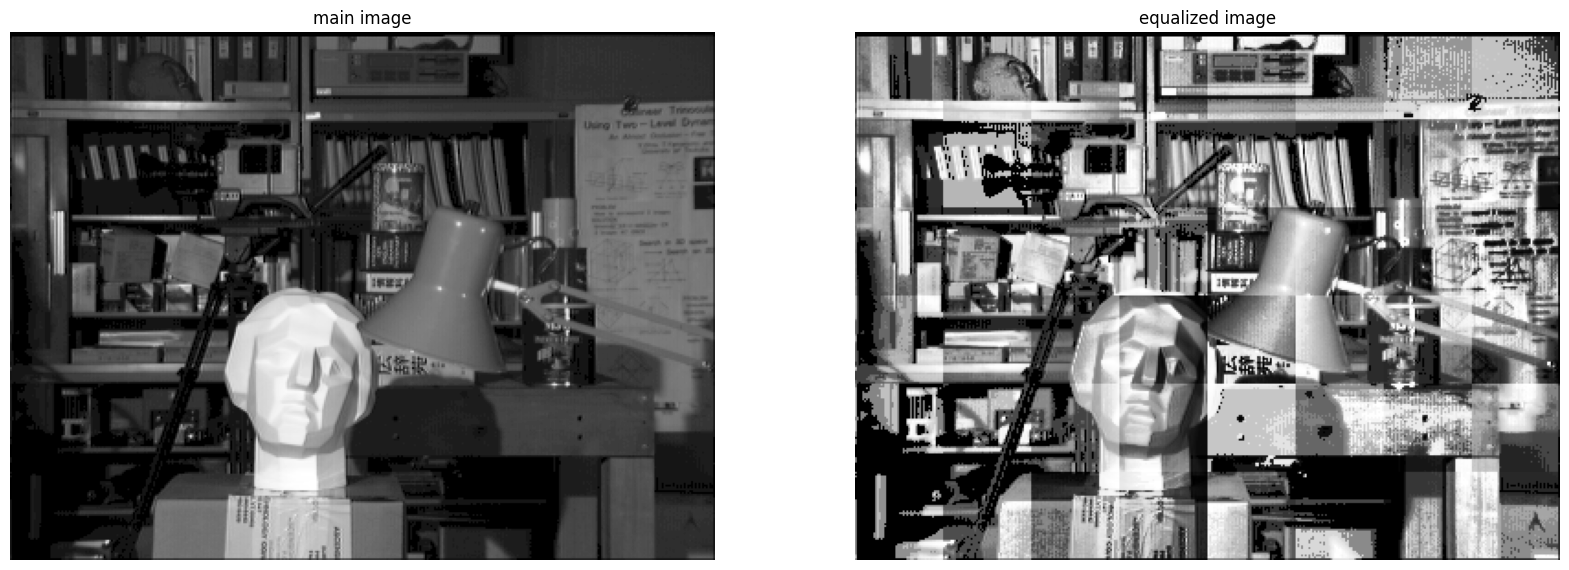

In [9]:
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.imshow(image, cmap='gray')
plt.title('main image')
plt.axis('off')

plt.subplot(1,2,2)
output_image = ACE1(image,48)
plt.imshow(output_image, cmap='gray')
plt.title('equalized image')
plt.axis('off')

## part b2

<h3> in this section we want to implement the second method for ACE </h3>
<h3> you are free to use opencv library </h3>

In [14]:
def ACE2(image, gridSize):
    '''
    you can just use the equalize function of OpenCV for each grid
    You can use OpenCV built-in tools for applying padding
    Use second method for ACE implementation (calculating transition function for each pixel)
    input(s):
      image (ndarray): input image
      gridSize (tuple): window size for calculating histogram equalization
    output(s):
      output (ndarray): improved image
    '''
    output = image.copy()
    padding_size_x = gridSize[0] // 2
    padding_size_y = gridSize[1] // 2

    # Apply padding to the image
    padded_image = cv2.copyMakeBorder(image, padding_size_x, padding_size_x, padding_size_y, padding_size_y, cv2.BORDER_REFLECT)
    
    # Iterate over image pixels
    for i in range(image.shape[0]):
      for j in range(image.shape[1]):
        # Define grid boundaries
        x_min = i
        x_max = i + gridSize[0]
        y_min = j
        y_max = j + gridSize[1]
        
        # Extract grid from padded image
        grid = padded_image[x_min:x_max, y_min:y_max]
        
        # Apply histogram equalization using OpenCV
        equalized_grid = cv2.equalizeHist(grid)
        
        # Update pixel value in output image
        output[i, j] = equalized_grid[padding_size_x, padding_size_y]

    return output

(-0.5, 383.5, 287.5, -0.5)

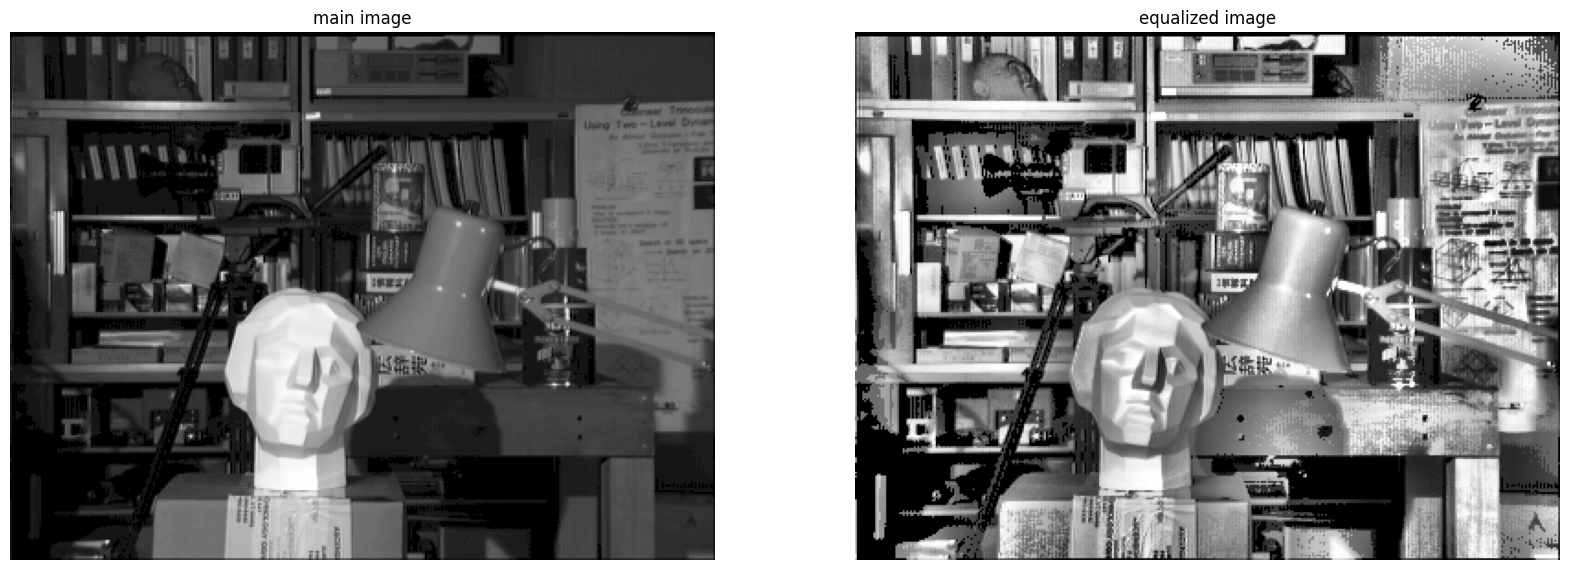

In [15]:
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.imshow(image, cmap='gray')
plt.title('main image')
plt.axis('off')

plt.subplot(1,2,2)
output_image = ACE2(image,(70,70))
plt.imshow(output_image, cmap='gray')
plt.title('equalized image')
plt.axis('off')

## part b3

<h3> in this section we want to implement CLAHE </h3>
<h3><b> note : you can just use opencv library for calculate histogram and applying padding </b></h3>
<h3><b>note : you can't use the equalize function of opencv</b></h3>

In [33]:
def CLAHE(image, gridSize, clip_limit):
    '''
    you can just use opencv library for calculate histogram and applying padding
    you can't use the equalize function of opencv
    Use second method for ACE implementation (calculating transition function for each pixel)
    input(s):
      image (ndarray): input image
      gridSize (tuple): window size for calculating histogram equalization
      clip_limit (int): threshold for contrast limiting
    output(s):
      output (ndarray): improved image
    '''
    output = image.copy()
    padding_size_x = gridSize[0] // 2
    padding_size_y = gridSize[1] // 2

    # Apply padding to the image
    padded_image = cv2.copyMakeBorder(image, padding_size_x, padding_size_x, padding_size_y, padding_size_y, cv2.BORDER_REFLECT)
    for i in range(image.shape[0]):
      for j in range(image.shape[1]):
        # Define grid boundaries
        x_min = i
        x_max = i + gridSize[0]
        y_min = j
        y_max = j + gridSize[1]
        
        # Extract grid from padded image
        grid = padded_image[x_min:x_max, y_min:y_max]
        
        # Compute histogram of the grid
        hist, _ = np.histogram(grid, bins=256, range=(0, 256))   # dividing image to 256 bins and each bin representing a range of possible pixel values (from 0 to 255)
        
        # Clip histogram
        hist_clipped = np.clip(hist, 0, clip_limit)
        
        # Compute cumulative distribution function
        cdf = np.cumsum(hist_clipped)
        cdf_normalized = cdf / np.sum(hist_clipped)
        
        # Compute equalization transfer function
        eq_transfer_function = (cdf_normalized * 255).astype(np.uint8)
        
        # Apply equalization transfer function to grid
        equalized_grid = eq_transfer_function[grid]
        
        # Update pixel value in output image
        output[i, j] = equalized_grid[padding_size_x, padding_size_y]

    return output

(-0.5, 383.5, 287.5, -0.5)

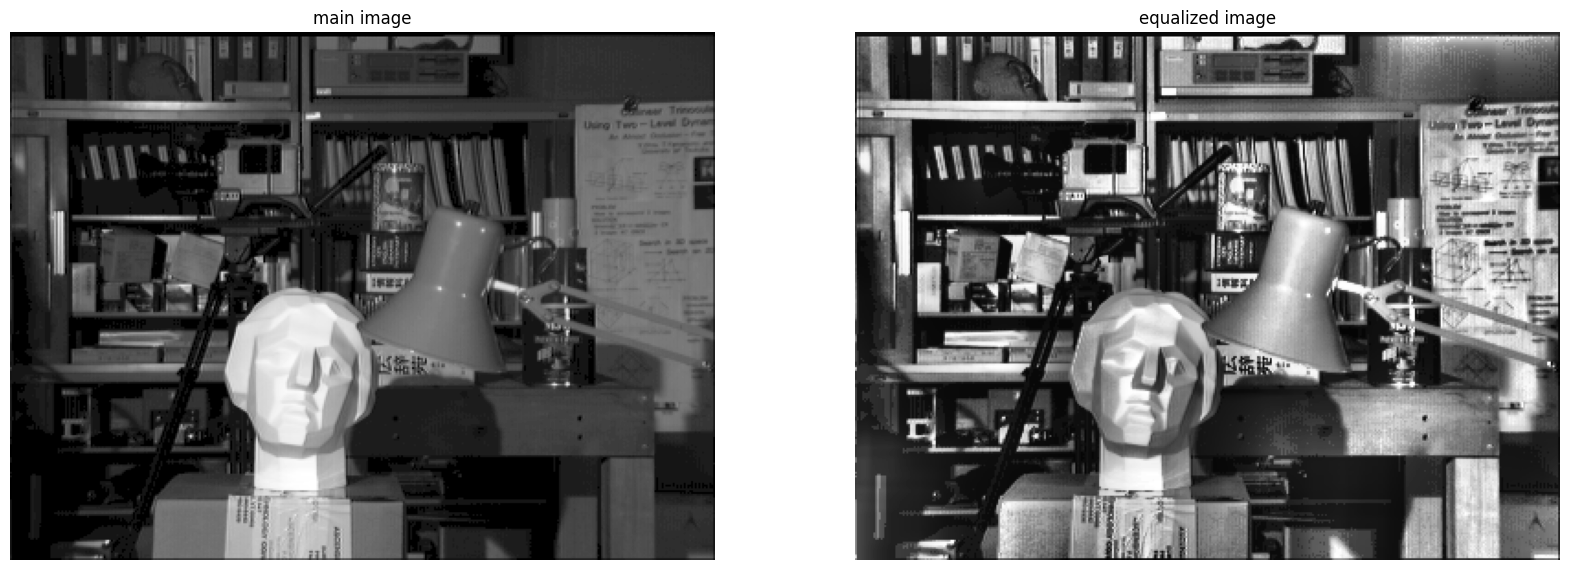

In [21]:
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.imshow(image, cmap='gray')
plt.title('main image')
plt.axis('off')

plt.subplot(1,2,2)
output_image = CLAHE(image,(70,70), 100)
plt.imshow(output_image, cmap='gray')
plt.title('equalized image')
plt.axis('off')

# part c


<h3> in this section we want to implement CLAHE using opencv </h3>


In [38]:
def CLAHE(image, gridSize, clipLimit):
    '''
    use opencv library for CLAHE.
    input(s):
      image (ndarray): input image
      gridSize (tuple): window size for calculating histogram equalization
      clip_limit (int): threshold for contrast limiting
    output(s):
      output (ndarray): improved image
    '''
    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Create CLAHE object
    clahe = cv2.createCLAHE(clipLimit=clipLimit, tileGridSize=gridSize)
    
    # Apply CLAHE to the grayscale image
    clahe_output = clahe.apply(gray_image)
    
    return clahe_output

<h3> run the following sections to answer part c </h3>


(-0.5, 383.5, 287.5, -0.5)

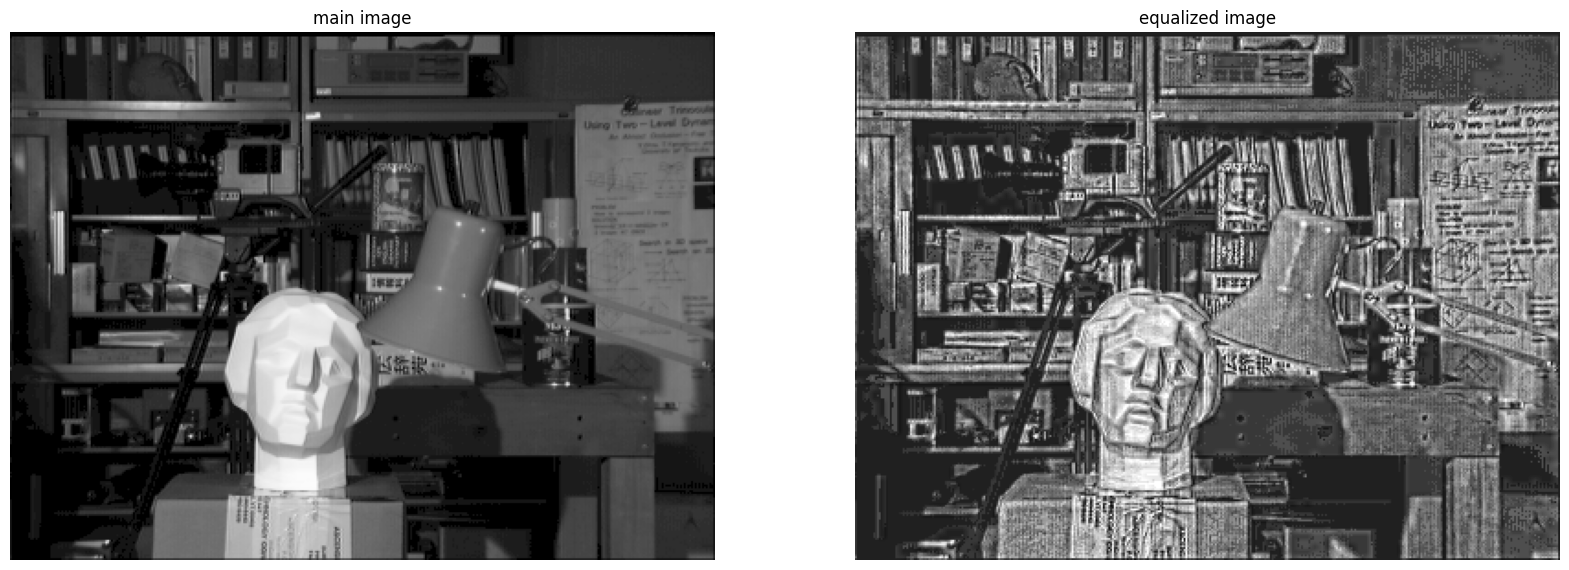

In [39]:
# dont change this cell
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.imshow(image, cmap='gray')
plt.title('main image')
plt.axis('off')

plt.subplot(1,2,2)
output_image1 = CLAHE(image,(128,128), 2)
plt.imshow(output_image1, cmap='gray')
plt.title('equalized image')
plt.axis('off')

(-0.5, 383.5, 287.5, -0.5)

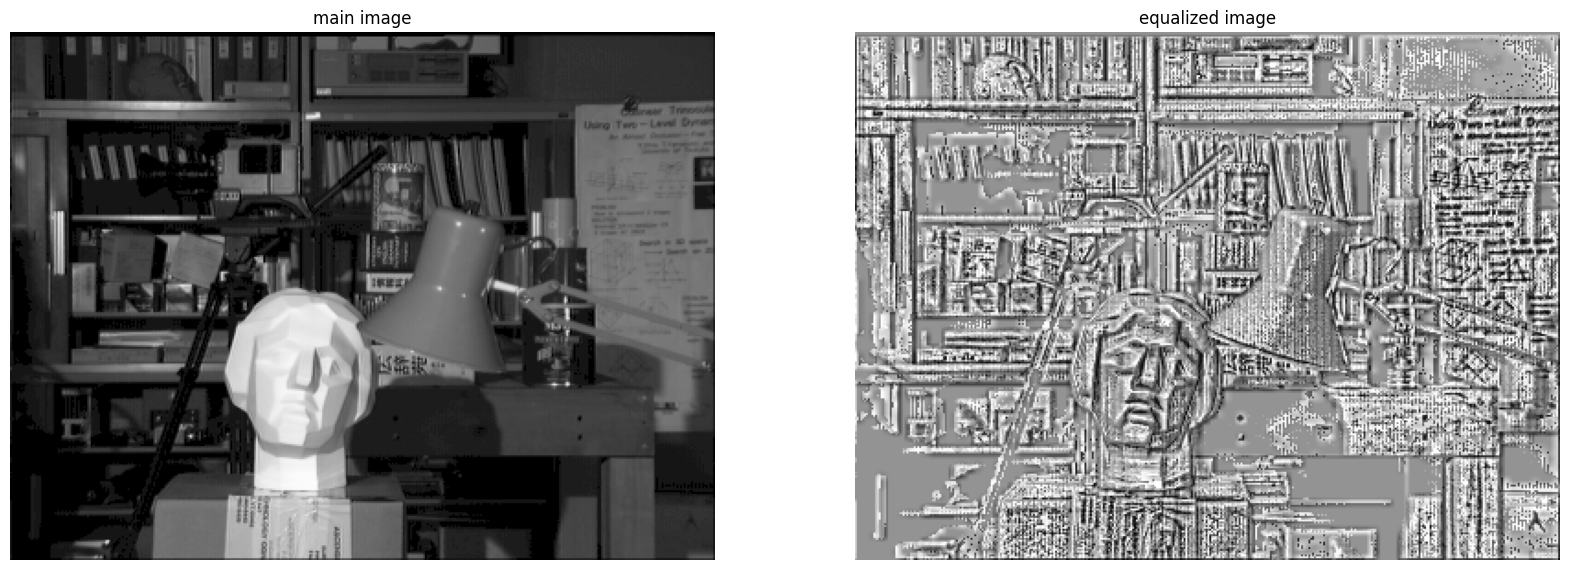

In [40]:
# dont change this cell
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.imshow(image, cmap='gray')
plt.title('main image')
plt.axis('off')

plt.subplot(1,2,2)
output_image2 = CLAHE(image,(128,128), 128)
plt.imshow(output_image2, cmap='gray')
plt.title('equalized image')
plt.axis('off')

(-0.5, 383.5, 287.5, -0.5)

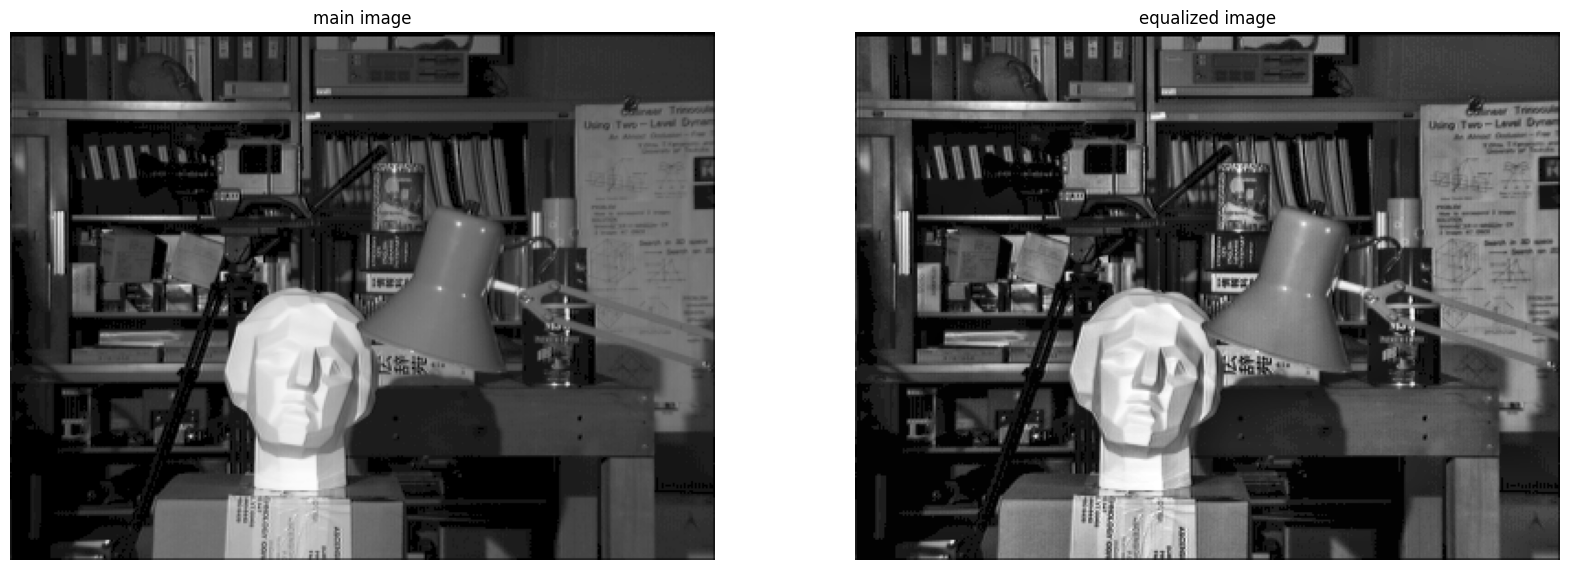

In [41]:
# dont change this cell
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.imshow(image, cmap='gray')
plt.title('main image')
plt.axis('off')

plt.subplot(1,2,2)
output_image3 = CLAHE(image,(16,16), 2)
plt.imshow(output_image3, cmap='gray')
plt.title('equalized image')
plt.axis('off')

(-0.5, 383.5, 287.5, -0.5)

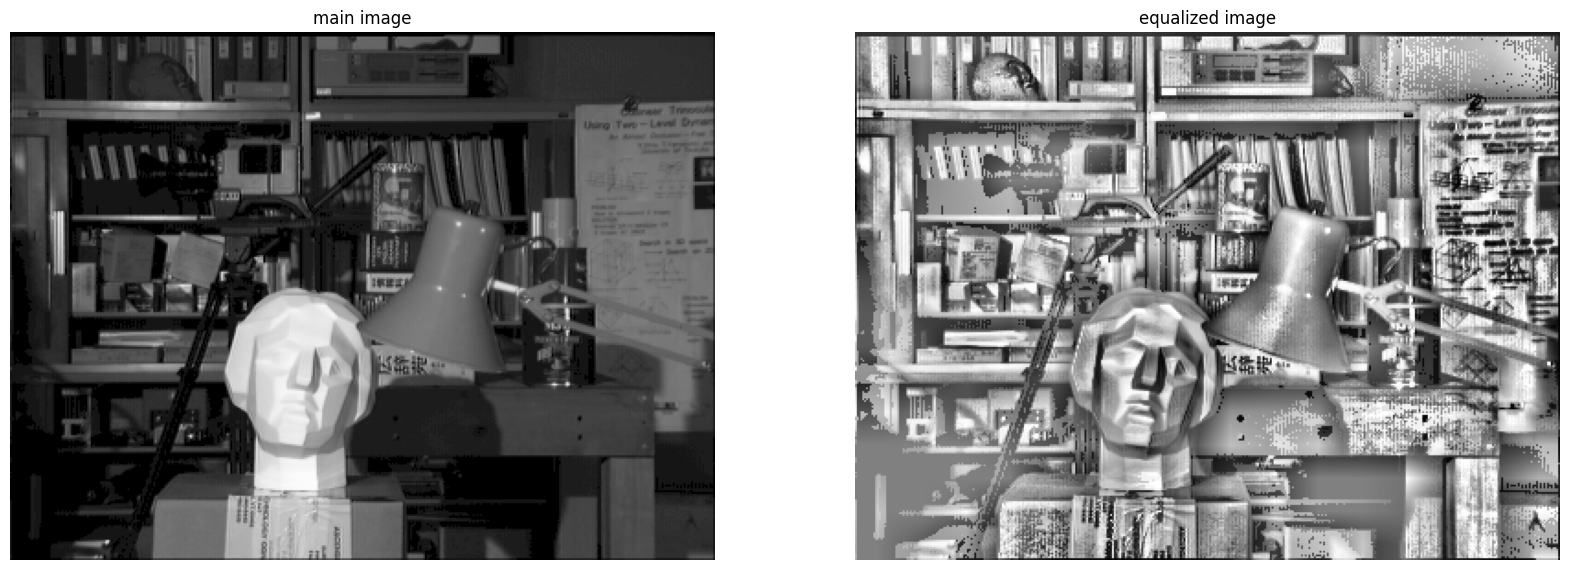

In [42]:
# dont change this cell
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.imshow(image, cmap='gray')
plt.title('main image')
plt.axis('off')

plt.subplot(1,2,2)
output_image4 = CLAHE(image,(16,16), 128)
plt.imshow(output_image4, cmap='gray')
plt.title('equalized image')
plt.axis('off')